<a href="https://colab.research.google.com/github/ACK638690/Prasunet_ML_2/blob/main/kmeans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
!pip install kneed

In [8]:
from kneed import KneeLocator

In [9]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
!kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [12]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


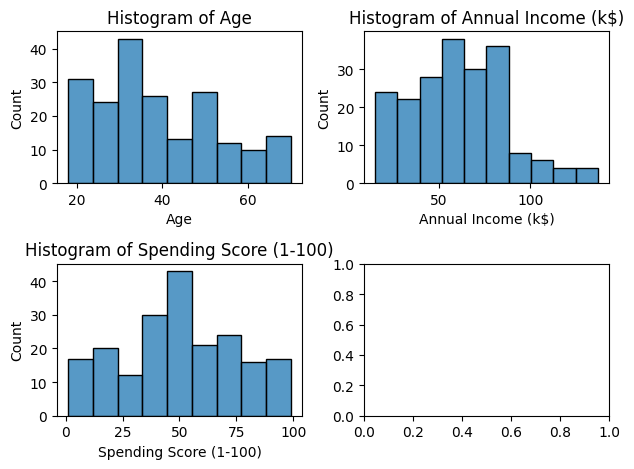

In [14]:
fig, axes = plt.subplots(2, 2)
axes = axes.ravel()

for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i])
    axes[i].set_title('Histogram of ' + col)


plt.tight_layout()
plt.show()

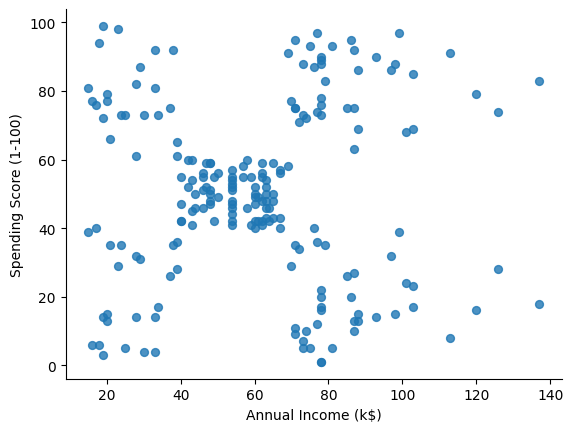

In [15]:
df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

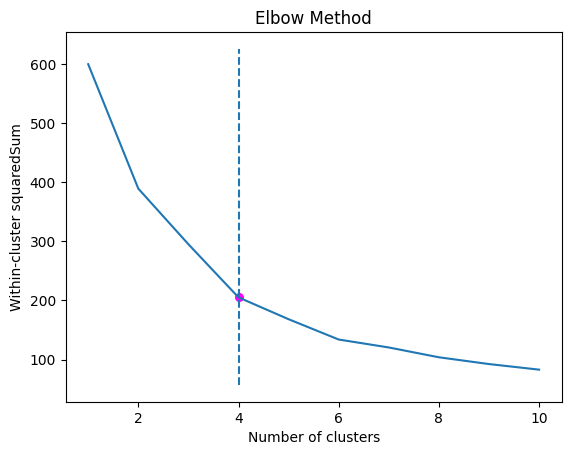

In [30]:
squaredSum = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    squaredSum.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y= squaredSum)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster squaredSum')
knee = KneeLocator(range(1, 11), squaredSum, curve='convex', direction='decreasing')

plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.scatter(knee.knee, knee.knee_y, color='magenta', s=30)

plt.show()

In [36]:
#Based on elbow method , no. of clusters=4
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
df['cluster'] = y_kmeans
segment_summary = df.groupby('cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={
    'Age': 'Mean Age',
    'Annual Income (k$)': 'Mean Annual Income (k$)',
    'Spending Score (1-100)': 'Mean Spending Score (1-100)',
    'CustomerID': 'Number of Customers'
})


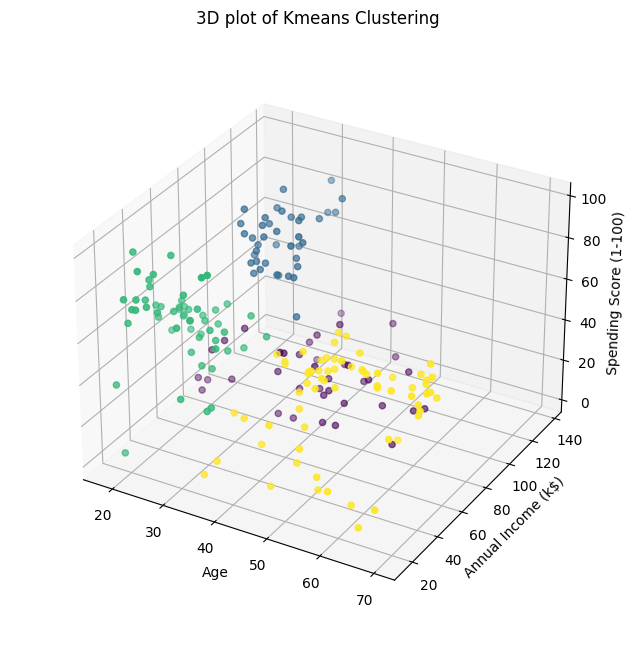

In [38]:
fig = plt.figure(figsize=(10, 8))
axes = fig.add_subplot(111, projection='3d')


axes.scatter3D(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis')


axes.set_xlabel('Age')
axes.set_ylabel('Annual Income (k$)')
axes.set_zlabel('Spending Score (1-100)')

plt.title('3D plot of Kmeans Clustering')

axes.set_box_aspect(aspect=None, zoom=0.9)
plt.show()